In [1]:
!pip install kaggle

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

!unzip imdb-dataset-of-50k-movie-reviews.zip

no


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

NameError: name 'n' is not defined

In [3]:

!ls

'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip   sample_data


In [4]:
import pandas as pd
db = pd.read_csv("IMDB Dataset.csv")

In [5]:
db.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
!pip install pandas nltk beautifulsoup4

In [7]:
import pandas as pd
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Fonction pour supprimer les balises HTML
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [10]:
# Fonction pour supprimer la ponctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [11]:
# Fonction pour convertir le texte en minuscules
def to_lowercase(text):
    return text.lower()

In [12]:
# Fonction pour supprimer les stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # ou 'english' selon la langue de votre texte
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [13]:
db['review'] = db['review'].apply(remove_html_tags)
db['review'] = db['review'].apply(remove_punctuation)
db['review'] = db['review'].apply(to_lowercase)
db['review'] = db['review'].apply(remove_stopwords)

print(db.head())


<ipython-input-9-c5a15f02c8c3>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


                                              review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically theres family little boy jake thinks...  negative
4  petter matteis love time money visually stunni...  positive


In [14]:
!pip install pandas nltk

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
db['review'] = db['review'].apply(lemmatize_text)
print(db.head())

                                              review sentiment
0  one reviewer mentioned watching 1 oz episode y...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically there family little boy jake think t...  negative
4  petter matteis love time money visually stunni...  positive


In [18]:
import spacy
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
!pip install tensorflow
!pip install nltk
!pip install scikit-learn

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:


tokenizer_reviews = db["review"].apply(nltk.word_tokenize)
db["tokenizer_reviews"] = tokenizer_reviews


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tokenizer_reviews)
sequences = tokenizer.texts_to_sequences(tokenizer_reviews)
x = pad_sequences(sequences, maxlen=500)


label_encoder = LabelEncoder()
db['encoded_label'] = label_encoder.fit_transform(db['sentiment'])


print(db.head())



                                              review sentiment  \
0  one reviewer mentioned watching 1 oz episode y...  positive   
1  wonderful little production filming technique ...  positive   
2  thought wonderful way spend time hot summer we...  positive   
3  basically there family little boy jake think t...  negative   
4  petter matteis love time money visually stunni...  positive   

                                   tokenizer_reviews  encoded_label  
0  [one, reviewer, mentioned, watching, 1, oz, ep...              1  
1  [wonderful, little, production, filming, techn...              1  
2  [thought, wonderful, way, spend, time, hot, su...              1  
3  [basically, there, family, little, boy, jake, ...              0  
4  [petter, matteis, love, time, money, visually,...              1  


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
!pip install pandas scikit-learn

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = pad_sequences(sequences,maxlen=500)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(db["sentiment"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)


db.head()

,review,sentiment,tokenizer_reviews,encoded_label
0,one reviewer mentioned watching 1 oz episode y...,positive,"[one, reviewer, mentioned, watching, 1, oz, ep...",1
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",1
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",1
3,basically there family little boy jake think t...,negative,"[basically, there, family, little, boy, jake, ...",0
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",1


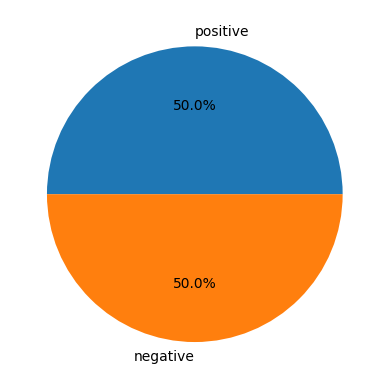

In [28]:
import matplotlib.pyplot as plt

sentiment_counts = db['sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.show()

In [29]:
!pip install tensorflow matplotlib

Epoch 1/50
1000/1000 [==============================] - 97s 87ms/step - loss: 0.3797 - accuracy: 0.8354 - val_loss: 0.2939 - val_accuracy: 0.8794 - lr: 0.0010
Epoch 2/50
1000/1000 [==============================] - 47s 47ms/step - loss: 0.2582 - accuracy: 0.8980 - val_loss: 0.2914 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 3/50
1000/1000 [==============================] - 40s 40ms/step - loss: 0.2089 - accuracy: 0.9200 - val_loss: 0.3081 - val_accuracy: 0.8708 - lr: 0.0010
Epoch 4/50
1000/1000 [==============================] - 38s 38ms/step - loss: 0.1653 - accuracy: 0.9384 - val_loss: 0.3744 - val_accuracy: 0.8702 - lr: 0.0010
Epoch 5/50
1000/1000 [==============================] - 37s 37ms/step - loss: 0.1270 - accuracy: 0.9552 - val_loss: 0.3918 - val_accuracy: 0.8665 - lr: 0.0010
Epoch 6/50
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0727 - accuracy: 0.9781 - val_loss: 0.4697 - val_accuracy: 0.8683 - lr: 1.0000e-04
Epoch 7/50
1000/1000 [====================

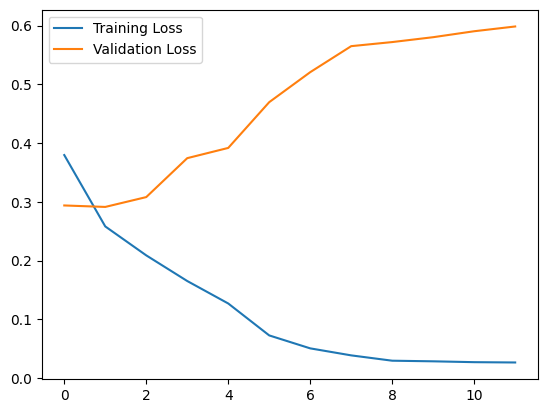

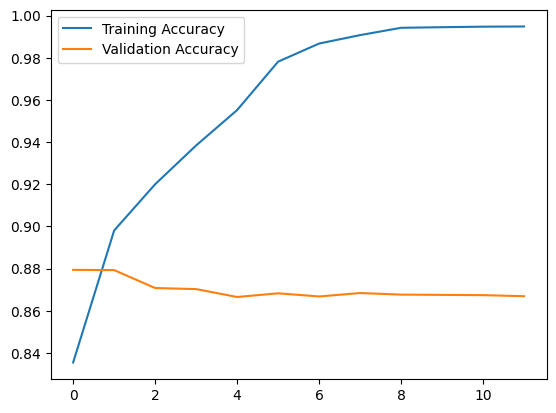

In [30]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt




early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-5)

# Définition du modèle LSTM
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history_lstm = model_lstm.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping, reduce_lr], batch_size=32)


plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
